# Data Visualization

Select a dataset we have used in class (or outside of class).

Generate a plot that you feel visualizes the data is an interesting way. Your plot should have the following elements:

>1) Title
>2) Legend
>3) Axes or other Labels
>4) Color
>5) 1 sentence description of what your plot shows
>6) Brief description of why you chose to make the plot the way you did.

You may use pandas, matplotlib, or seaborn.

Upload a pdf of the plot to Canvas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
import geopandas
from IPython.display import display
warnings.simplefilter(action='ignore',category=FutureWarning)

%config InlineBackend.figure_format ='retina'


In [2]:
df = pd.read_csv('Longitudinal Religious Congregations and Membership File, 1980-2010 (State Level).csv',delimiter=',',skipfooter=14,engine='python')

In [3]:
gdf = geopandas.GeoDataFrame(df)
#display(gdf.head(2))
#display(gdf.tail(2))

#print("\n")
gdf=gdf[~gdf['STATEAB'].str.contains("AK")]
gdf=gdf[~gdf['STATEAB'].str.contains("HI")]
#display(gdf.head(2))
#display(gdf.tail(2))

#print("\n")
gdf=gdf[gdf['GRPNAME'].isin(['Catholic Church','Southern Baptist Church',
                             'Southern Baptist Convention','The United Methodist Church, old count',
                             'Evangelical Lutheran Church in America Groups Combined','Assemblies of God'])]
#gdf=gdf[gdf['GRPNAME'].str.contains('Southern Baptist Church')]

#gdf = gdf[gdf['GRPNAME'].str.contains('Catholic Church')]
#gdf = gdf['GRPNAME'].str.contains('Southern Baptist Convention')
# gdf = gdf[gdf['GRPNAME'] == 'Southern Baptist Convention']
# gdf = gdf[gdf['GRPNAME'] == 'The United Methodist Church, old count']
# gdf = gdf[gdf['GRPNAME'] == 'Evangelical Lutheran Church in America Groups Combined']
# gdf = gdf[gdf['GRPNAME'] == 'Assemblies of God']
gdf
#gdf.GRPNAME

,STFIP,STATEAB,YEAR,TOTPOP,GRPCODE,GRPNAME,ADHERENT,CONGREG,RELTRAD,FAMILY,NOTE_MIS,NOTE_COM,NOTE_MEA
292,1,AL,1980,3893888,419,Southern Baptist Convention,1182018.0,3005.0,1,96.0,0,0,3
294,1,AL,1980,3893888,081,Catholic Church,106123.0,169.0,3,87.0,0,0,2
301,1,AL,1980,3893888,053,Assemblies of God,48610.0,345.0,1,94.0,0,0,0
309,1,AL,1980,3893888,207b,Evangelical Lutheran Church in America Groups ...,5119.0,19.0,2,90.0,0,2,0
323,1,AL,1980,3893888,449,"The United Methodist Church, old count",344790.0,1524.0,2,92.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18215,56,WY,2000,493782,053,Assemblies of God,5067.0,46.0,1,94.0,0,0,0
18230,56,WY,2000,493782,419,Southern Baptist Convention,17101.0,78.0,1,96.0,0,0,3
18257,56,WY,2010,563626,449,"The United Methodist Church, old count",9223.0,40.0,2,92.0,0,0,0
18263,56,WY,2010,563626,419,Southern Baptist Convention,15812.0,100.0,1,96.0,0,0,3


In [4]:
usa = geopandas.read_file('../data/s_22mr22.shp')
usa

,STATE,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.240980,64.240190,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.826760,32.793540,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.439200,34.899770,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,AS,American Samoa,60,-170.372150,-14.264860,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773..."
4,AZ,Arizona,04,-111.664570,34.293230,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."
5,CA,California,06,-119.608180,37.245370,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263..."
6,CO,Colorado,08,-105.547830,38.998550,"POLYGON ((-106.87560 41.00301, -106.85850 41.0..."
7,CT,Connecticut,09,-72.726230,41.621960,"MULTIPOLYGON (((-73.62247 40.98430, -73.62209 ..."
8,DC,District of Columbia,11,-77.014640,38.909320,"MULTIPOLYGON (((-77.03097 38.80826, -77.03110 ..."
9,DE,Delaware,10,-75.505920,38.995590,"MULTIPOLYGON (((-75.22731 38.58854, -75.22744 ..."


In [5]:
usa=usa[~usa['STATE'].astype(str).str.contains("GU")]
usa=usa[~usa['STATE'].astype(str).str.contains("MP")]
usa=usa[~usa['STATE'].astype(str).str.contains("PW")]
usa=usa[~usa['STATE'].astype(str).str.contains("FM")]
usa=usa[~usa['STATE'].astype(str).str.contains("MH")]
usa=usa[~usa['STATE'].astype(str).str.contains("AS")]
usa=usa[~usa['STATE'].astype(str).str.contains("VI")]
usa=usa[~usa['STATE'].astype(str).str.contains("HI")]
usa=usa[~usa['STATE'].astype(str).str.contains("AK")]
usa=usa[~usa['STATE'].astype(str).str.contains("PR")]


# #usa.xset([-200,-25])

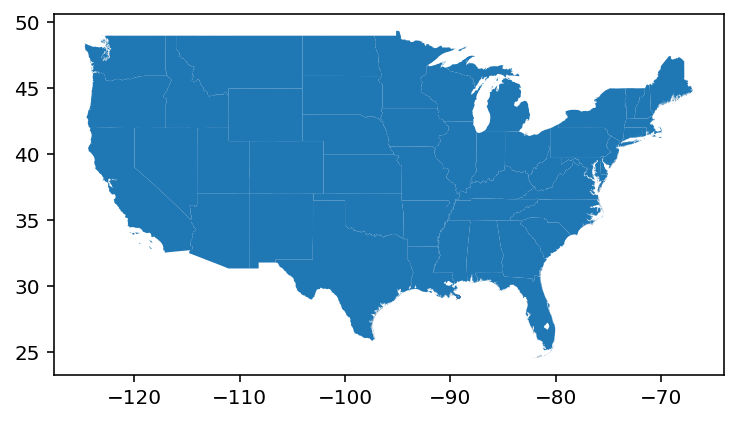

In [6]:
usa.plot();

In [7]:
df_merged = gdf.merge(usa , left_on = "STATEAB" , right_on = "STATE")

In [8]:
df_merged=df_merged.drop("CONGREG",axis=1)
df_merged=df_merged.drop("RELTRAD",axis=1)
df_merged=df_merged.drop("FAMILY",axis=1)
df_merged=df_merged.drop("NOTE_COM",axis=1)
df_merged=df_merged.drop("NOTE_MEA",axis=1)
df_merged=df_merged.drop("GRPCODE",axis=1)
df_merged=df_merged[~df_merged['YEAR'].astype(str).str.contains("1980")]
df_merged=df_merged[~df_merged['YEAR'].astype(str).str.contains("1990")]
df_merged=df_merged[~df_merged['YEAR'].astype(str).str.contains("2000")]
df_merged=df_merged.drop("STFIP",axis=1)
df_merged=df_merged.drop("NOTE_MIS",axis=1)

In [9]:
df_merged

,STATEAB,YEAR,TOTPOP,GRPNAME,ADHERENT,STATE,NAME,FIPS,LON,LAT,geometry
15,AL,2010,4779736,Evangelical Lutheran Church in America Groups ...,5062.0,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
16,AL,2010,4779736,"The United Methodist Church, old count",299151.0,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
17,AL,2010,4779736,Southern Baptist Convention,1392363.0,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
18,AL,2010,4779736,Catholic Church,200657.0,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
19,AL,2010,4779736,Assemblies of God,54821.0,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
...,...,...,...,...,...,...,...,...,...,...,...
958,WV,2010,1852994,Catholic Church,95849.0,WV,West Virginia,54,-80.61372,38.64259,"POLYGON ((-80.52020 40.63791, -80.51900 40.634..."
959,WV,2010,1852994,Evangelical Lutheran Church in America Groups ...,13129.0,WV,West Virginia,54,-80.61372,38.64259,"POLYGON ((-80.52020 40.63791, -80.51900 40.634..."
975,WY,2010,563626,"The United Methodist Church, old count",9223.0,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.10339 45.00591, -109.08920 45.0..."
976,WY,2010,563626,Southern Baptist Convention,15812.0,WY,Wyoming,56,-107.55144,42.99963,"POLYGON ((-109.10339 45.00591, -109.08920 45.0..."


In [10]:
gdf_merged = geopandas.GeoDataFrame(df_merged)

In [11]:
gdf_merged['ADHERENT'] = gdf_merged.ADHERENT

In [ ]:
gdf_merged.explore('ADHERENT', legend=False)

In [ ]:
#5- 1 sentence description of what your plot shows
#The plot is an interactive map of the US (excluding territories besides DC, Alaska, and Hawaii) that shows the most likely Church a newborn Christian would be associated with (though not very accurate since this is just a trial to see if this can be used in the project

In [ ]:
#6 -Brief description of why you chose to make the plot the way you did.
#I chose to make the plot the way I did because our data is based on a state by state basis. Therefore, by doing an interactive map the viewer can see the different results for each individual state.